In [24]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv(r'D:\Datasets\Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [26]:
data.drop('Serial No.',axis=1,inplace=True)

In [27]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [28]:
data.shape

(400, 8)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


#### Data doesnot contain any null values

The dataset contains several parameters which are considered important during the application for Masters Programs.

The parameters included are :

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )

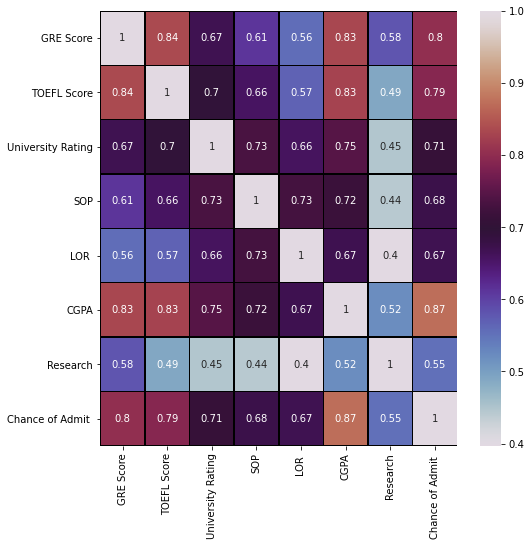

In [30]:
plt.figure(figsize=[8,8])
sbn.heatmap(data.corr(),annot=True,cmap='twilight',linewidth=0.5,linecolor='black')
plt.show()

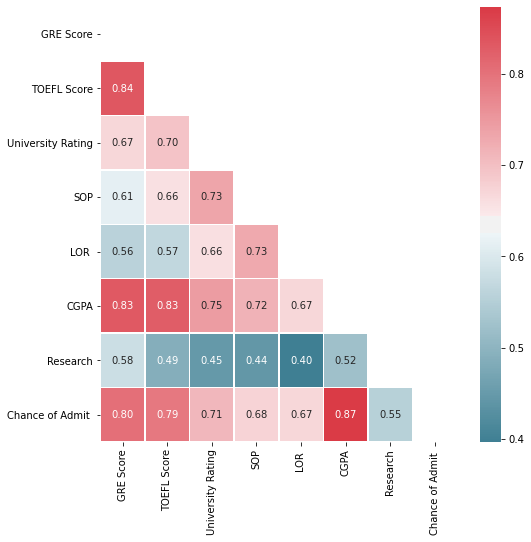

In [31]:
import numpy as np
corr = data.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sbn.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sbn.diverging_palette(220, 10, as_cmap=True)
sbn.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

## From Correlation matrix we get 4 important insights :- 

1 :- There is a very good correlation in CGPA and GRE&TOEFL scores.This means,most probably one who has performed well in college and achieved good CGPA has also scored good in GRE&TOEFL exams and vice-versa.

2 :- The good the performance in college and GRE&TOEFL scores the more the chances of getting in good university.

3 :- University Ranking,SOP(Statement of purpose) and LOR(Letter Of Recommendation) has somewhat impact of getting in good university.

4 :- Research has very less impact on getting the admission in university.

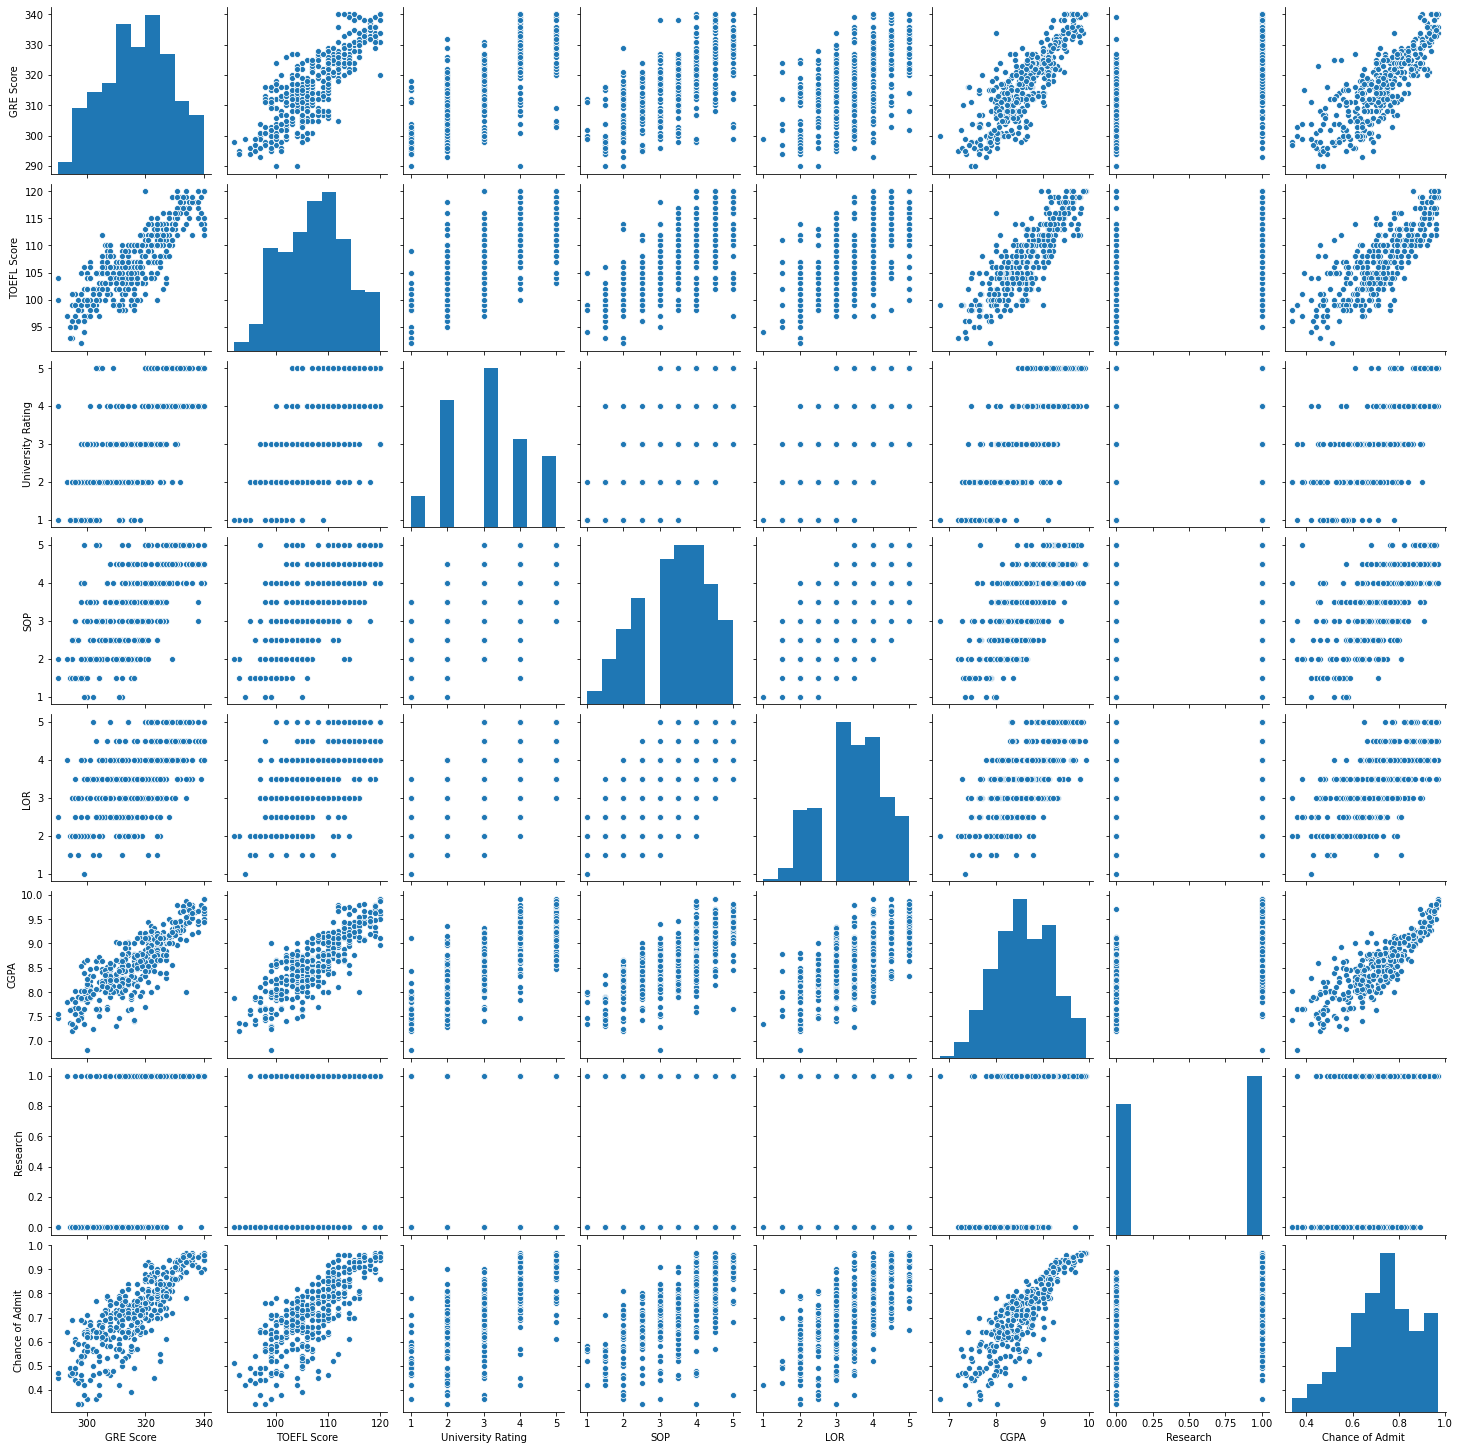

In [32]:
sbn.pairplot(data,palette='rainbow_r')
plt.show()

In [33]:
data['GRE Score'].describe()

count    400.000000
mean     316.807500
std       11.473646
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64

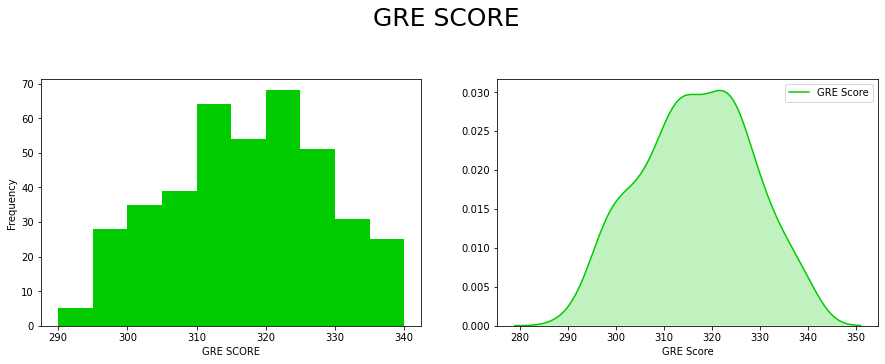

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
data['GRE Score'].plot.hist(color='#00cc00')
plt.xlabel('GRE SCORE')
plt.subplot(2,2,2)
sbn.kdeplot(data['GRE Score'],color='#00cc00',shade=True)
plt.xlabel('GRE Score')
plt.suptitle('GRE SCORE',fontsize=25)
plt.show()

In [35]:
data['TOEFL Score'].describe()

count    400.000000
mean     107.410000
std        6.069514
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64

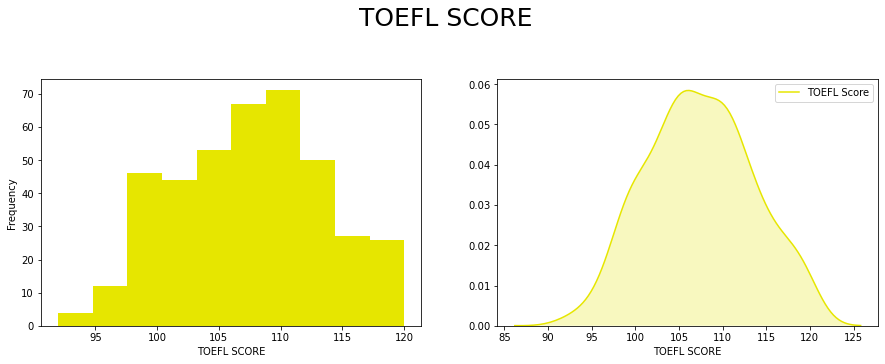

In [36]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
data['TOEFL Score'].plot.hist(color='#e6e600')
plt.xlabel('TOEFL SCORE')
plt.subplot(2,2,2)
sbn.kdeplot(data['TOEFL Score'],shade=True,color='#e6e600')
plt.xlabel('TOEFL SCORE')
plt.suptitle('TOEFL SCORE',fontsize=25)
plt.show()

In [37]:
data['CGPA'].describe()

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: CGPA, dtype: float64

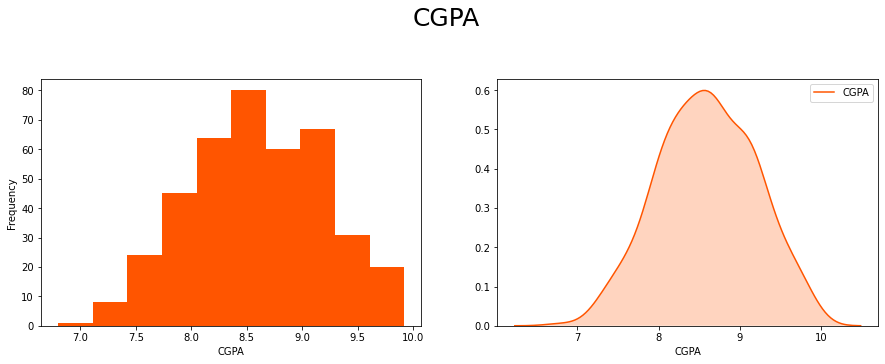

In [38]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
data['CGPA'].plot.hist(color='#ff5500')
plt.xlabel('CGPA')
plt.subplot(2,2,2)
sbn.kdeplot(data['CGPA'],shade=True,color='#ff5500')
plt.xlabel('CGPA')
plt.suptitle('CGPA',fontsize=25)
plt.show()

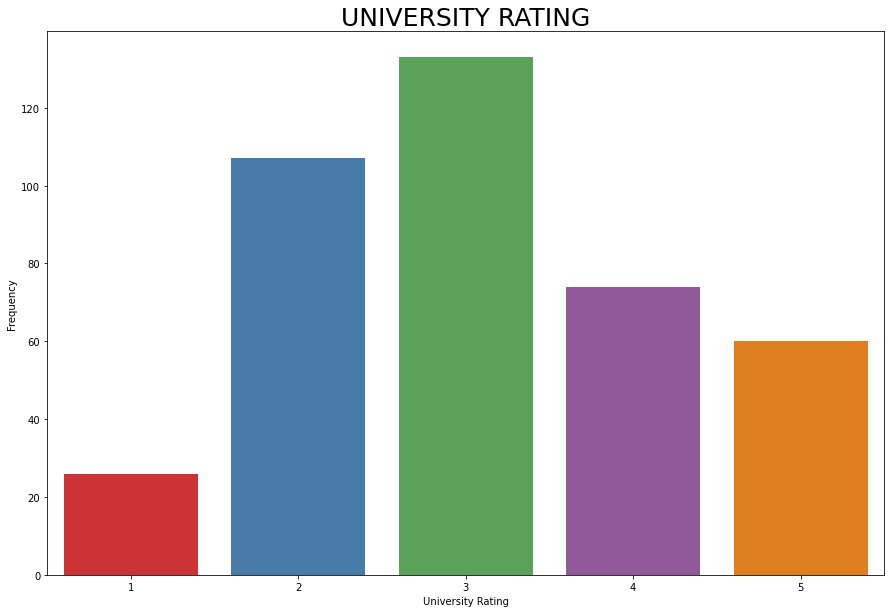

In [39]:
plt.figure(figsize=(15,10))
sbn.countplot(x='University Rating',data=data,palette='Set1')
plt.xlabel('University Rating')
plt.ylabel('Frequency')
plt.title('UNIVERSITY RATING',fontsize=25)
plt.show()

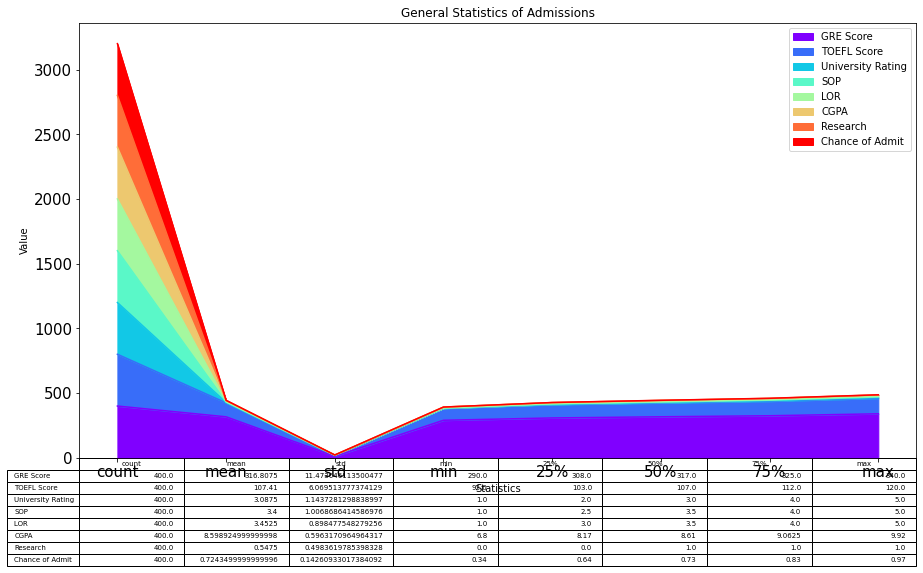

In [40]:
data.describe().plot(kind = "area",fontsize=15, figsize = (15,8), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Admissions")
plt.show()


In [41]:
x = data.drop('Chance of Admit ',axis=1)
y = data['Chance of Admit ']

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
x = preprocessing.normalize(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [43]:
import lazypredict

In [46]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0,ignore_warnings=True,custom_metric=None,predictions=True)
models,pred = reg.fit(x_train, x_test, y_train, y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:05<00:00,  7.79it/s]


In [47]:
models

,R-Squared,RMSE,Time Taken
Model,,,
ExtraTreesRegressor,0.68,0.07,0.30
LinearSVR,0.64,0.08,0.05
RandomForestRegressor,0.64,0.08,0.48
GradientBoostingRegressor,0.64,0.08,0.19
HistGradientBoostingRegressor,0.63,0.08,0.80
HuberRegressor,0.63,0.08,0.07
LGBMRegressor,0.62,0.08,0.11
GeneralizedLinearRegressor,0.62,0.08,0.02
TweedieRegressor,0.62,0.08,0.03
